# Association of Lifestyle with Sleep Health in Working Adults

## Data Analysis

### Data Exploration

In [1]:
#Importing of numpy, pandas, matplotlib and seaborn libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading of the Sleep health and lifestyle dataset
df = pd.read_csv("Sleep_health_and_lifestyle.csv")

In [3]:
#Data Exploration: First few rows of the dataset showing the key variables
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
#Data Exploration: Description of the data types for the variables in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
#Data Exploration: Shape of the dataset describing the total number of rows and columns
df.shape

(374, 13)

In [6]:
#Data Exploration: Key summary statistics for distributions of age, sleep duration, physical activity, and other factors.
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### Demographic Profile

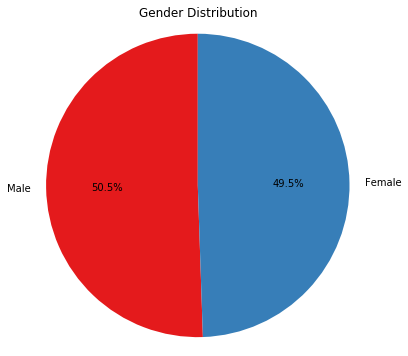

In [7]:
# Pie chart for Gender Distribution
Gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(Gender_counts, labels = Gender_counts.index, autopct = '%1.1f%%', startangle = 90, colors = sns.color_palette('Set1'))
plt.title('Gender Distribution')
plt.axis('equal') 
plt.show()


_50.5% were males, 49.5% were females._

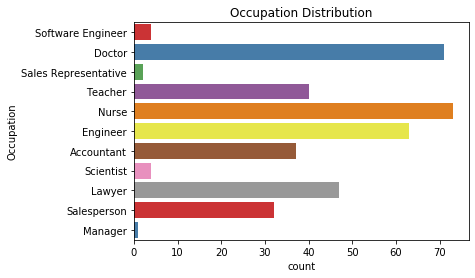

In [8]:
# Bar chart for occupation distribution
sns.countplot(y = 'Occupation', data = df, palette = 'Set1')
plt.title('Occupation Distribution');

_The majority of the participants were health personnels. Specifically, the study comprised of 73 Nurses and 71 Doctors. The least represented was the occupation manger with only 1 participant._

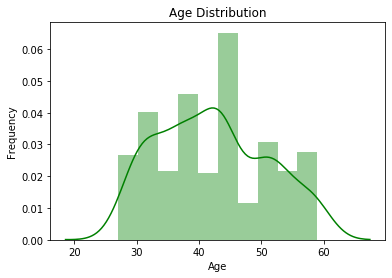

In [9]:
# Histogram for Age Distribution
sns.distplot(df.Age, bins = 10, color = 'g')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Genearting another variable "Age Group" 
bins = [26, 30, 35, 40, 45, 50, 60]  # Age ranges 
labels = ['26-30', '31-35', '36-40', '41-45', '46-50', '50+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

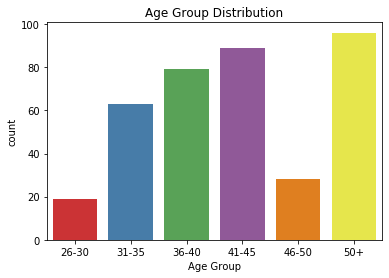

In [11]:
# Bar chart for Age Group Distribution
sns.countplot(x = 'Age Group', data = df, palette = 'Set1')
plt.title('Age Group Distribution');

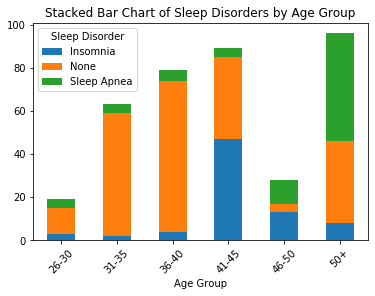

In [12]:
# stacked bar chart for sleep disorders by age group
df.groupby(['Age Group', 'Sleep Disorder']).size().unstack().plot(kind='bar', stacked=True)
plt.xticks(rotation = 45)
plt.title('Stacked Bar Chart of Sleep Disorders by Age Group');


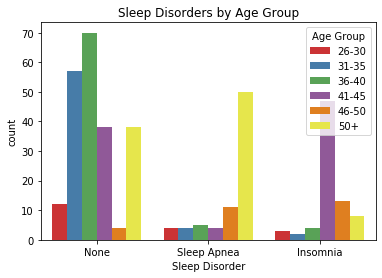

In [13]:
# stacked bar chart for sleep disorders by age group
sns.countplot(x = 'Sleep Disorder', hue = 'Age Group', data = df, palette = 'Set1')
plt.title('Sleep Disorders by Age Group');

_The age group 50+ has the highest number of individuals. In comparing the prevalence of different sleep disorders across various age groups, there seems to be an increasing prevalence of sleep apnea (green) in the later categories (46 - 50 and 50+)_

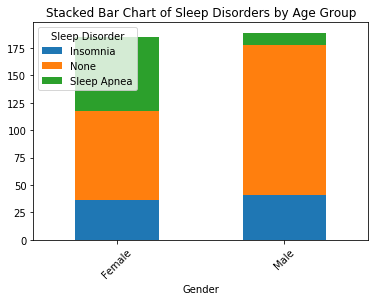

In [14]:
# stacked bar chart for sleep disorders by gender
df.groupby(['Gender', 'Sleep Disorder']).size().unstack().plot(kind='bar', stacked=True)
plt.xticks(rotation = 45)
plt.title('Stacked Bar Chart of Sleep Disorders by Age Group');

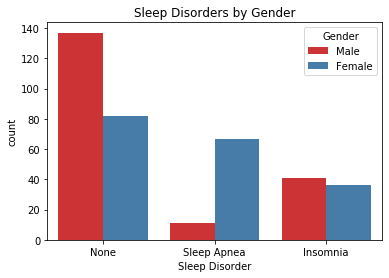

In [15]:
# stacked bar chart for sleep disorders by gender
sns.countplot(x = 'Sleep Disorder', hue = 'Gender', data = df, palette = 'Set1')
plt.title('Sleep Disorders by Gender');

_Males seem to report no sleep disorders at a higher rate and females are more likely to report sleep apnea and insomnia_

### Sleep Analysis

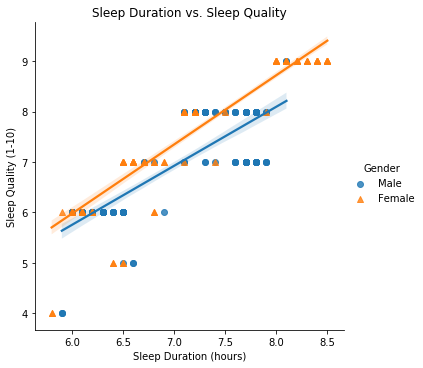

In [16]:
#Scatter plot for sleep duration and sleep quality
sns.lmplot(x = 'Sleep Duration', y = 'Quality of Sleep', data = df, hue = 'Gender', markers = ['o', '^'] )
plt.title('Sleep Duration vs. Sleep Quality')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Sleep Quality (1-10)')
plt.show();

_There is a positive correlation between sleep duration and sleep quality in both males and females. As sleep duration increases, the perceived sleep quality also improves but the trendline is steeper for females. This indicates that for females, sleep quality improves more rapidly with additional sleep hours._

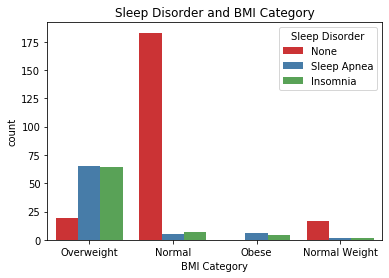

In [17]:
# stacked bar chart for BMI category and sleep disorder
sns.countplot(x='BMI Category', hue='Sleep Disorder', data = df, palette='Set1')
plt.title('Sleep Disorder and BMI Category');

_Majority of the participants in the normal BMI category of individuals do not have a sleep disorder, as shown by the extremely high red bar_

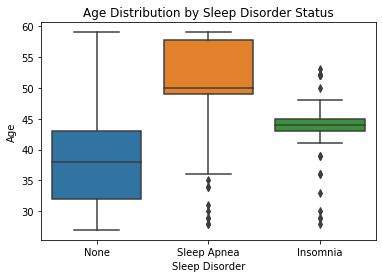

In [18]:
# Box plot for age distribution and sleep disorders
sns.boxplot(x = 'Sleep Disorder', y = 'Age', data = df)
plt.title('Age Distribution by Sleep Disorder Status');

_Healthy sleep (blue) tends to be more common among younger participants. The relatively wide age range indicates that healthy sleep is possible across various age groups, but the median age is lower, showing that youth correlates more with healthier sleep. Sleep apnea (orange) becomes more common as participants age, with a higher median age indicating that it predominantly affects older adults. The wide distribution and outliers suggest variability, with older individuals at the greatest risk. Insomnia (green) is concentrated among older individuals, with a high median age. Insomnia tends to affect older participants more consistently than the other sleep disorders, though some younger individuals also experience insomnia based on the outliers._

### Activity and Health Metrics

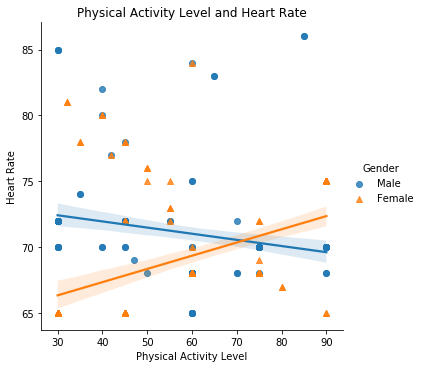

In [19]:
# scatter plot showing the relationship between physical activity level and heart rate
sns.lmplot(x = 'Physical Activity Level', y = 'Heart Rate', data = df, hue = 'Gender', markers = ['o', '^'] )
plt.title('Physical Activity Level and Heart Rate');

_For females, heart rate seems to increase with higher physical activity. For males, the data suggests that heart rate might decrease or remain constant with increased physical activity._

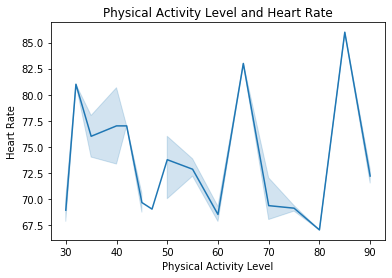

In [20]:
# Line graph showing the relationship between physical activity level and heart rate
sns.lineplot(x='Physical Activity Level', y='Heart Rate', data=df)
plt.title('Heart Rate Over Physical Activity')
plt.title('Physical Activity Level and Heart Rate');

*The line shows fluctuations in heart rate as the level of physical activity increases, but there is no consistent upward or downward trend across the whole chart. The figure suggests that physical activity generally influences heart rate, but there is significant individual variability. Some individuals may experience lower heart rates with more activity, while others may not follow the same pattern as consistently*

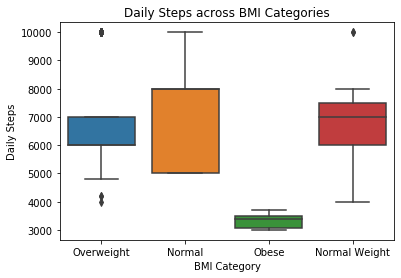

In [21]:
# Box plot showing the distribution of daily steps across different BMI categories
sns.boxplot(x = 'BMI Category', y = 'Daily Steps', data = df)
plt.title('Daily Steps across BMI Categories');

_Normal-weight individuals (especially the orange group) tend to be more physically active, while obese individuals show lower daily step counts. The data suggests a possible inverse relationship between BMI and physical activity, where higher BMI (overweight and obese categories) correlates with lower daily steps, while normal-weight individuals tend to have higher activity levels. Activity variability is highest among normal-weight individuals, meaning this group contains both highly active and less active people, while the obese group has consistently low activity._

### Stress and Sleep

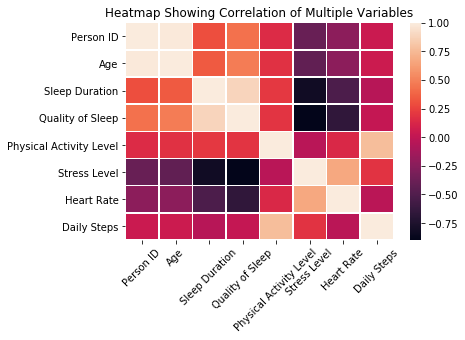

In [22]:
# Heatmap showing correlation of multiple variables in the dataset
sns.heatmap(df.corr(), cbar = True, linewidths = 0.5)
plt.title('Heatmap Showing Correlation of Multiple Variables')
plt.xticks(rotation = 45);

_The colours in the heatmap range from light shades (indicating positive correlation) to dark shades (indicating negative correlation), based on the intensity of the relationship between the variables. Stress level and sleep quality correspond to  a darker colour (black) suggesting a  strong negative relationship between stress levels and sleep quality, where higher stress generally leads to lower sleep quality._ 




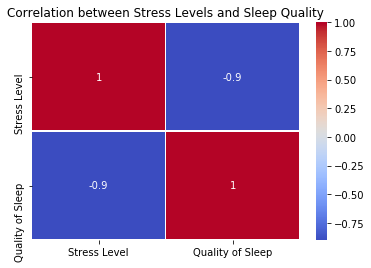

In [23]:
# Heatmap showing correlation between Stress Levels and Sleep Quality
corr = df[['Stress Level', 'Quality of Sleep']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Stress Levels and Sleep Quality');

_Similary, the heatmap displaying the two variables (Stress level and sleep quality) shows an inverse relationship. Which means an increase in one is associated with a decrease in the other._

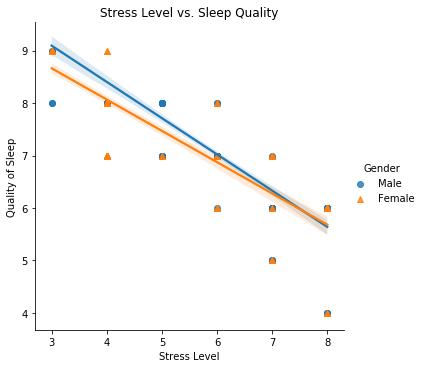

In [24]:
# Scatter plot for stress levels and sleep quality
sns.lmplot(x = 'Stress Level', y = 'Quality of Sleep', data = df, hue = 'Gender', markers = ['o', '^'])
plt.title('Stress Level vs. Sleep Quality');

_The slope of the trendline for males (blue) appears slightly steeper than for females (orange), suggesting that sleep quality in males might decline more sharply as stress increases, compared to females._

### Additional Visuals

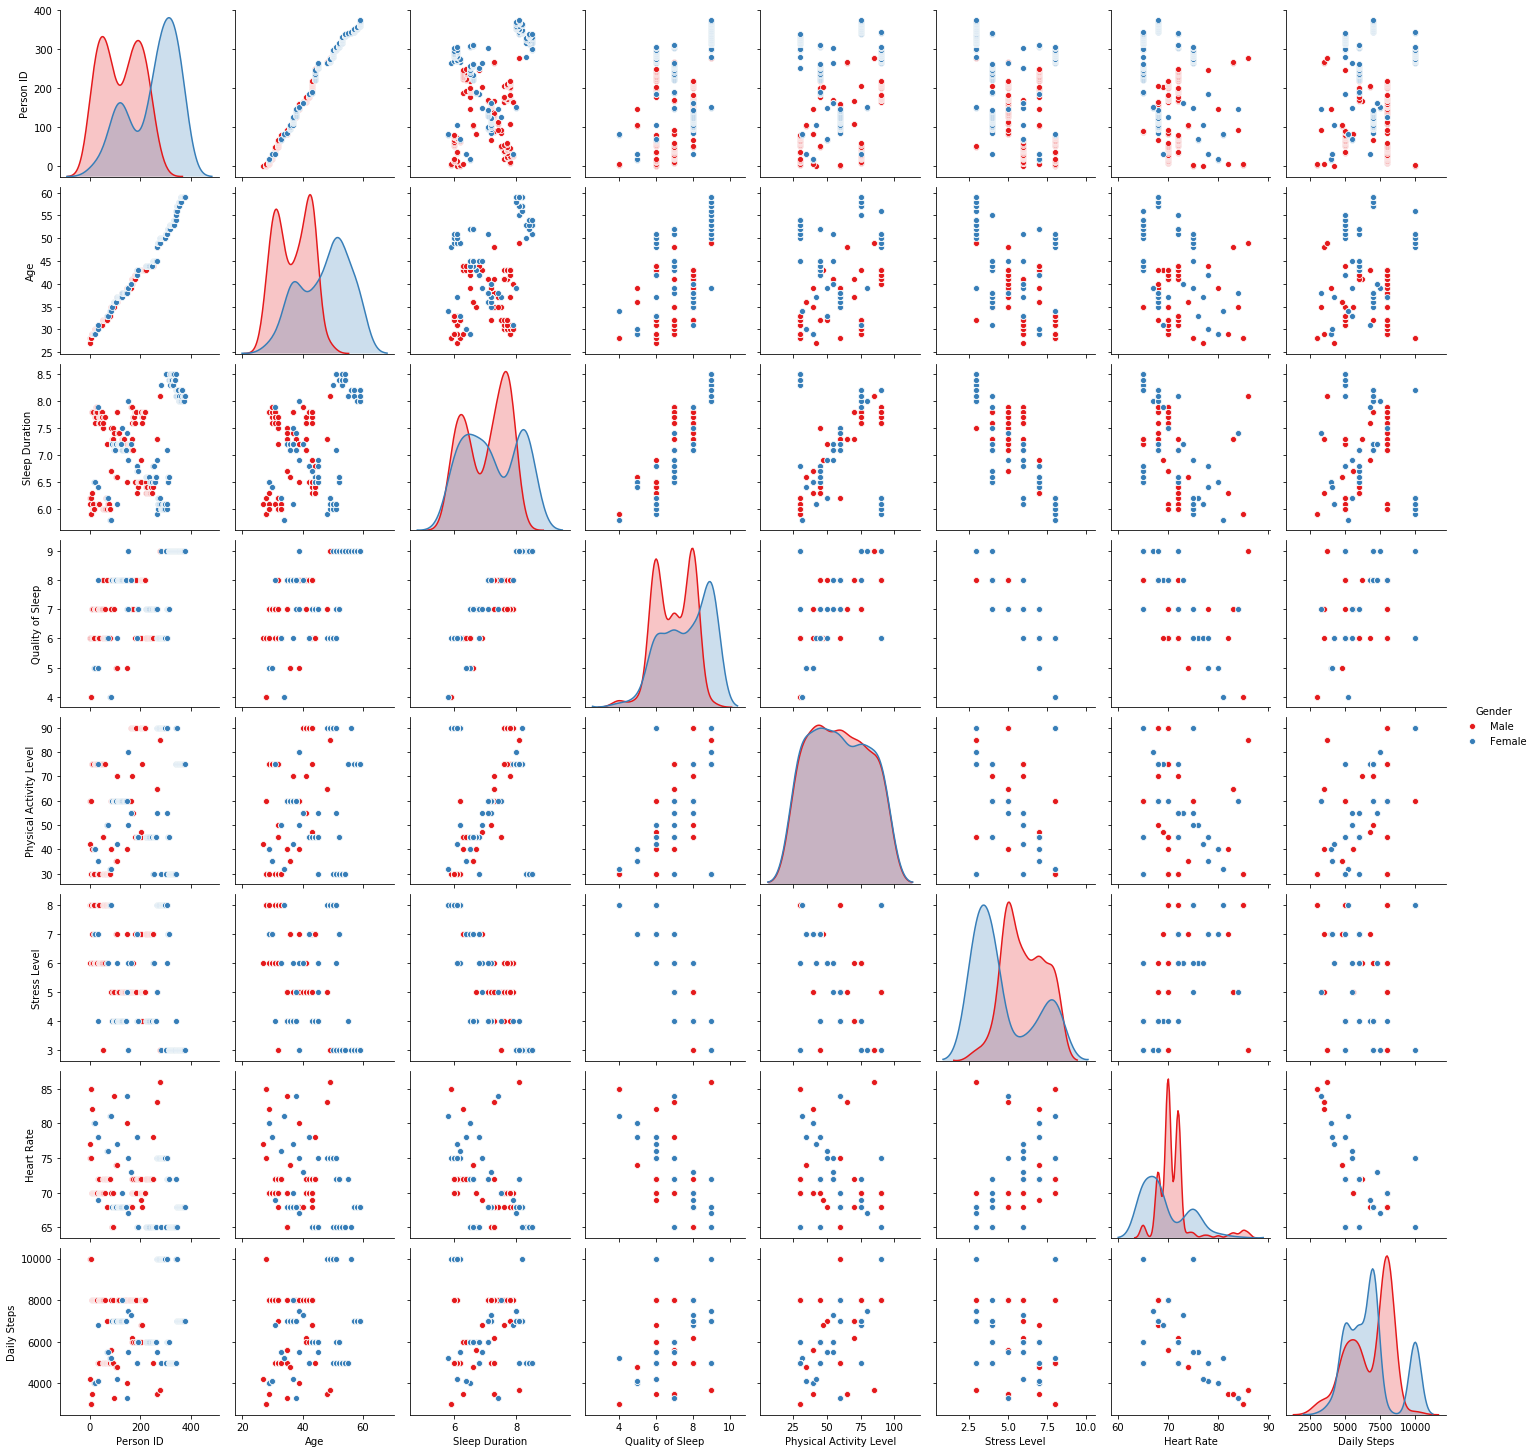

In [25]:
# Pairplot revealing correlations, trends, or even outliers that would not be immediately obvious from looking at the raw data.
sns.pairplot(df, hue = 'Gender', palette = 'Set1');

_A pairplot is used to explore relationships between multiple variables in a dataset. Each diagonal element represents the distribution of a single variable, often shown as a histogram or kernel density estimate (KDE). The off-diagonal elements represent pairwise scatter plots between two variables, allowing us to detect potential correlations or patterns. It can help us reveal correlations, trends, or even outliers that would not be immediately obvious from looking at the raw data._

## Conclusion

_The findings highlight that sleep health is influenced by several lifestyle factors, including gender, age, BMI, stress, and physical activity. Males generally report healthier sleep, while females experience more sleep disorders like apnea and insomnia. Sleep apnea becomes more prevalent with age, particularly in individuals over 46, while younger participants tend to have healthier sleep. There is a positive correlation between sleep quality and duration, especially for females. Normal-weight individuals are more physically active, and higher BMI correlates with lower activity levels. Additionally, high stress levels are linked to poorer sleep quality, and while physical activity impacts heart rate, the relationship varies across individuals. Overall, maintaining a healthy lifestyle through regular activity and stress management is crucial for better sleep health._ 